In [1]:
import pandas as pd
import numpy as np
import torch

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
import matplotlib.pyplot as plt

## X data 불러오기

In [2]:
x_data = pd.read_csv('D:/6.교육/FD2_Analysis.L_XDATA.csv')
print(x_data.columns)
x_data

Index(['TIME', 'EQP 2', 'MODULE 2', 'LOT_ID 2', 'TIME_PROCESS', 'Para 01',
       'Para 02', 'Para 03', 'Para 04', 'Para 05', 'Para 06', 'Para 07',
       'Para 08', 'Para 09', 'Para 10', 'Para 11', 'Para 12', 'Para 13',
       'Para 14', 'Para 15', 'Para 16', 'Para 17', 'Para 18', 'Para 19'],
      dtype='object')


,TIME,EQP 2,MODULE 2,LOT_ID 2,TIME_PROCESS,Para 01,Para 02,Para 03,Para 04,Para 05,...,Para 10,Para 11,Para 12,Para 13,Para 14,Para 15,Para 16,Para 17,Para 18,Para 19
0,14:17.9,C,D,ABCAC29,1,-0.139785,-0.753355,-1.024975,-1.505540,-0.237628,...,1.884452,1.482281,-1.932399,-0.380771,-0.380771,0.003895,0.743457,-1.029292,-2.853902,2.222534
1,14:18.9,C,D,ABCAC29,2,-0.139785,-0.753355,-1.024975,-1.408907,-0.219155,...,1.884452,1.482281,-1.932399,-0.380771,-0.380771,0.003895,0.743457,-1.029292,-2.853902,2.222534
2,14:19.9,C,D,ABCAC29,3,-0.139785,0.173656,-1.024975,-1.289265,-0.237628,...,2.137315,1.482281,-1.932399,-0.380771,-0.380771,0.003895,0.648641,-1.029292,-2.853902,2.335617
3,14:20.9,C,D,ABCAC29,4,-0.139785,0.173656,-1.024975,-1.169624,-0.219155,...,1.884452,1.482281,-1.932399,-0.380771,-0.380771,0.003895,0.553824,-1.006165,-2.853902,2.222534
4,14:21.9,C,D,ABCAC29,5,-0.139785,0.173656,-1.024975,-0.999365,-0.237628,...,2.137315,1.482281,-1.932399,-0.380771,-0.380771,0.003895,0.364192,-1.006165,-2.853902,2.222534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508201,21:39.3,B,C,ABCAM73,596,0.211300,0.173656,-1.024975,-0.309126,0.076406,...,0.114413,-1.159996,0.187298,0.480142,0.480142,0.402657,-0.015074,1.283399,0.503272,-1.056851
508202,21:40.2,B,C,ABCAM73,597,0.211300,0.173656,-1.024975,-0.318330,0.076406,...,0.114413,-0.956744,0.187298,0.480142,0.480142,0.402657,-0.015074,1.283399,0.503272,-1.056851
508203,21:41.4,B,C,ABCAM73,598,0.211300,0.173656,-1.024975,-0.322931,0.076406,...,0.367276,-0.956744,0.187298,0.480142,0.480142,0.402657,-0.015074,1.283399,0.503272,-1.056851
508204,21:42.4,B,C,ABCAM73,599,0.035757,0.173656,1.102850,-0.327533,0.057933,...,0.367276,-0.956744,0.187298,0.480142,0.480142,0.402657,-0.015074,1.283399,0.503272,-1.056851


## Y data 불러오기

In [3]:
y_data = pd.read_csv('D:/6.교육/FD2_Analysis.L_YDATA.csv')
print(y_data.columns)
y_data

Index(['LOT_ID 2', 'WF_ID', 'Site', 'X axis', 'Y axis', 'Response'], dtype='object')


,LOT_ID 2,WF_ID,Site,X axis,Y axis,Response
0,ABCA764,3,7,-55,48,-0.198842
1,ABCA764,3,8,-55,-17,-0.006703
2,ABCA764,3,11,-100,81,-0.115168
3,ABCA764,3,3,-10,15,-0.000505
4,ABCA764,3,1,-122,15,0.442652
...,...,...,...,...,...,...
35173,ABC9321,3,6,35,48,-0.394079
35174,ABC9321,3,13,80,-50,-0.394079
35175,ABC9321,3,9,35,-17,-0.434366
35176,ABC9321,3,10,80,81,-0.431267


## 사용하지 않는 X변수 제거

In [4]:
x_data = x_data.drop(['TIME','EQP 2', 'MODULE 2','TIME_PROCESS'], axis=1)
x_data

,LOT_ID 2,Para 01,Para 02,Para 03,Para 04,Para 05,Para 06,Para 07,Para 08,Para 09,Para 10,Para 11,Para 12,Para 13,Para 14,Para 15,Para 16,Para 17,Para 18,Para 19
0,ABCAC29,-0.139785,-0.753355,-1.024975,-1.505540,-0.237628,-0.134672,1.791254,1.111967,1.359035,1.884452,1.482281,-1.932399,-0.380771,-0.380771,0.003895,0.743457,-1.029292,-2.853902,2.222534
1,ABCAC29,-0.139785,-0.753355,-1.024975,-1.408907,-0.219155,-0.134672,2.415552,1.111967,1.359035,1.884452,1.482281,-1.932399,-0.380771,-0.380771,0.003895,0.743457,-1.029292,-2.853902,2.222534
2,ABCAC29,-0.139785,0.173656,-1.024975,-1.289265,-0.237628,-0.134672,0.542658,1.111967,1.359035,2.137315,1.482281,-1.932399,-0.380771,-0.380771,0.003895,0.648641,-1.029292,-2.853902,2.335617
3,ABCAC29,-0.139785,0.173656,-1.024975,-1.169624,-0.219155,0.975136,1.791254,1.111967,1.359035,1.884452,1.482281,-1.932399,-0.380771,-0.380771,0.003895,0.553824,-1.006165,-2.853902,2.222534
4,ABCAC29,-0.139785,0.173656,-1.024975,-0.999365,-0.237628,-0.134672,0.542658,1.111967,0.755216,2.137315,1.482281,-1.932399,-0.380771,-0.380771,0.003895,0.364192,-1.006165,-2.853902,2.222534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508201,ABCAM73,0.211300,0.173656,-1.024975,-0.309126,0.076406,-0.504608,0.542658,-0.710376,-1.358148,0.114413,-1.159996,0.187298,0.480142,0.480142,0.402657,-0.015074,1.283399,0.503272,-1.056851
508202,ABCAM73,0.211300,0.173656,-1.024975,-0.318330,0.076406,-1.244481,0.542658,-0.710376,-1.358148,0.114413,-0.956744,0.187298,0.480142,0.480142,0.402657,-0.015074,1.283399,0.503272,-1.056851
508203,ABCAM73,0.211300,0.173656,-1.024975,-0.322931,0.076406,-1.244481,0.542658,-1.317824,-1.056239,0.367276,-0.956744,0.187298,0.480142,0.480142,0.402657,-0.015074,1.283399,0.503272,-1.056851
508204,ABCAM73,0.035757,0.173656,1.102850,-0.327533,0.057933,-0.504608,0.542658,-1.317824,-1.056239,0.367276,-0.956744,0.187298,0.480142,0.480142,0.402657,-0.015074,1.283399,0.503272,-1.056851


## X, Y 결측치 파악

In [9]:
x_data.isnull().sum()

LOT_ID 2    0
Para 01     0
Para 02     0
Para 03     0
Para 04     0
Para 05     0
Para 06     0
Para 07     0
Para 08     0
Para 09     0
Para 10     0
Para 11     0
Para 12     0
Para 13     0
Para 14     0
Para 15     0
Para 16     0
Para 17     0
Para 18     0
Para 19     0
dtype: int64

In [6]:
y_data.isnull().sum()

LOT_ID 2     0
WF_ID        0
Site         0
X axis       0
Y axis       0
Response    14
dtype: int64

In [7]:
y_data = y_data.dropna()
y_data

,LOT_ID 2,WF_ID,Site,X axis,Y axis,Response
0,ABCA764,3,7,-55,48,-0.198842
1,ABCA764,3,8,-55,-17,-0.006703
2,ABCA764,3,11,-100,81,-0.115168
3,ABCA764,3,3,-10,15,-0.000505
4,ABCA764,3,1,-122,15,0.442652
...,...,...,...,...,...,...
35173,ABC9321,3,6,35,48,-0.394079
35174,ABC9321,3,13,80,-50,-0.394079
35175,ABC9321,3,9,35,-17,-0.434366
35176,ABC9321,3,10,80,81,-0.431267


## LOT_ID별 mean 값 요약

In [8]:
mean_data = x_data.groupby(x_data['LOT_ID 2']).mean()
mean_data

,Para 01,Para 02,Para 03,Para 04,Para 05,Para 06,Para 07,Para 08,Para 09,Para 10,Para 11,Para 12,Para 13,Para 14,Para 15,Para 16,Para 17,Para 18,Para 19
LOT_ID 2,,,,,,,,,,,,,,,,,,,
ABC7207GX,-0.374428,0.003704,-0.054403,-0.857575,0.025114,0.894367,-0.328238,1.151452,-0.554063,-0.441885,0.737023,-1.015257,-0.121062,-0.121062,-0.138165,-0.092349,-1.461187,0.268269,0.681035
ABC7377,0.909674,0.017097,0.050518,-1.332333,-1.083830,-2.343210,-0.323672,-0.431920,-0.608649,0.620139,-1.049746,0.638893,0.215686,0.215686,0.159983,0.194279,1.553418,0.437256,1.018707
ABC7501MD,-0.969225,-0.005566,0.089428,-0.823914,0.862444,0.557725,-0.517608,1.342291,-0.152021,0.114413,0.825099,-1.020962,0.390408,0.390408,0.007384,0.369881,-0.644499,0.230120,-0.189698
ABC7574,0.413715,-0.012980,0.031641,-0.257215,-0.735434,0.268503,-0.488836,1.089226,-0.705602,0.024796,0.590474,-0.988940,0.008970,0.008970,0.017330,0.084160,-0.174635,0.248653,-0.930033
ABC7647,-1.295442,0.026879,0.081061,-1.718179,1.234573,-2.042310,-0.158637,-0.365649,-0.675833,0.564087,-0.985877,0.551049,0.091407,0.091407,0.161904,0.245671,1.321096,0.441927,1.072299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ABCAK34,-0.570902,0.029437,-0.024240,-0.428094,0.345410,1.167799,-0.469099,1.199901,-0.486077,-0.499021,0.585401,-0.971612,0.068803,0.068803,0.027117,0.184182,-1.396398,0.218184,-0.818832
ABCAK47,1.197378,0.022496,-0.009534,-0.280322,-1.121482,-0.430744,-0.166819,-0.768998,-0.909554,0.358020,-1.261115,0.542856,-0.020891,-0.020891,0.068088,-0.237048,1.335194,0.412880,-0.893154
ABCAL10,1.129096,0.020699,0.004509,-0.319334,-1.454292,1.034943,-0.505122,1.199035,-0.545006,-0.159100,0.859313,-0.970611,0.013593,0.013593,0.097105,0.108345,-1.355960,0.217302,-0.732870


## X, Y 데이터 병합

In [10]:
full_data = y_data.merge(mean_data, left_on='LOT_ID 2', right_on='LOT_ID 2', how='inner')
full_data

,LOT_ID 2,WF_ID,Site,X axis,Y axis,Response,Para 01,Para 02,Para 03,Para 04,...,Para 10,Para 11,Para 12,Para 13,Para 14,Para 15,Para 16,Para 17,Para 18,Para 19
0,ABCA764,3,7,-55,48,-0.198842,0.310317,-0.027634,-0.042412,-0.552697,...,-0.290335,0.530953,-1.001769,-0.142651,-0.142651,0.005719,0.132751,-1.201301,0.299231,0.381044
1,ABCA764,3,8,-55,-17,-0.006703,0.310317,-0.027634,-0.042412,-0.552697,...,-0.290335,0.530953,-1.001769,-0.142651,-0.142651,0.005719,0.132751,-1.201301,0.299231,0.381044
2,ABCA764,3,11,-100,81,-0.115168,0.310317,-0.027634,-0.042412,-0.552697,...,-0.290335,0.530953,-1.001769,-0.142651,-0.142651,0.005719,0.132751,-1.201301,0.299231,0.381044
3,ABCA764,3,3,-10,15,-0.000505,0.310317,-0.027634,-0.042412,-0.552697,...,-0.290335,0.530953,-1.001769,-0.142651,-0.142651,0.005719,0.132751,-1.201301,0.299231,0.381044
4,ABCA764,3,1,-122,15,0.442652,0.310317,-0.027634,-0.042412,-0.552697,...,-0.290335,0.530953,-1.001769,-0.142651,-0.142651,0.005719,0.132751,-1.201301,0.299231,0.381044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35159,ABC9567,3,6,35,48,-0.759761,0.758667,-0.044600,-0.056858,1.445626,...,-0.938270,-0.170791,0.986022,-0.266835,-0.266835,-0.053996,-0.362944,0.284324,0.328684,0.482648
35160,ABC9567,3,13,80,-50,-0.465356,0.758667,-0.044600,-0.056858,1.445626,...,-0.938270,-0.170791,0.986022,-0.266835,-0.266835,-0.053996,-0.362944,0.284324,0.328684,0.482648
35161,ABC9567,3,9,35,-17,-0.434366,0.758667,-0.044600,-0.056858,1.445626,...,-0.938270,-0.170791,0.986022,-0.266835,-0.266835,-0.053996,-0.362944,0.284324,0.328684,0.482648
35162,ABC9567,3,10,80,81,-0.400277,0.758667,-0.044600,-0.056858,1.445626,...,-0.938270,-0.170791,0.986022,-0.266835,-0.266835,-0.053996,-0.362944,0.284324,0.328684,0.482648


In [11]:
data_x = full_data.drop(['LOT_ID 2', 'WF_ID', 'Site', 'X axis', 'Y axis', 'Response'], axis=1)
data_y = full_data['Response']

## Train, Test Split

In [12]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.3, random_state=2020)

## 전체 data에 대한 Linear 모델 통계량

In [13]:
lm = sm.OLS(train_y, train_x).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Response   R-squared (uncentered):                   0.042
Model:                            OLS   Adj. R-squared (uncentered):              0.041
Method:                 Least Squares   F-statistic:                              59.47
Date:                Tue, 28 Jan 2020   Prob (F-statistic):                   3.48e-211
Time:                        14:43:41   Log-Likelihood:                         -39075.
No. Observations:               24614   AIC:                                  7.819e+04
Df Residuals:                   24596   BIC:                                  7.833e+04
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Para 01        0.0199      0.046      0.430      0.667      -0.071       0.111
Para 02        1.5937      0.311      5.122      0.000       0.984       2.204
Para 03        0.3288      0.253      1.301      0.193      -0.167       0.824
Para 04       -0.0150      0.023     -0.643      0.520      -0.061       0.031
Para 05       -0.0555      0.040     -1.375      0.169      -0.135       0.024
Para 06     1.678e-05      0.024      0.001      0.999      -0.048       0.048
Para 07       -0.0765      0.081     -0.939      0.348      -0.236       0.083
Para 08        0.0237      0.052      0.459      0.646      -0.078       0.125
Para 09       -0.4981      0.031    -15.991      0.000      -0.559      -0.437
Para 10       -0.1592      0.036     -4.471      0.000      -0.229      -0.089
Para 11        0.0479      0.059      0.812      0.417      -0.068       0.164
Para 12        0.5196      0.034     15.161      0.000       0.452       0.587
Para 13       -0.0945      0.030     -3.157      0.002      -0.153      -0.036
Para 14       -0.0945      0.030     -3.157      0.002      -0.153      -0.036
Para 15        1.0337      0.111      9.282      0.000       0.815       1.252
Para 16       -0.0629      0.082     -0.766      0.444      -0.224       0.098
Para 17       -0.2443      0.033     -7.379      0.000      -0.309      -0.179
Para 18       -0.4787      0.063     -7.593      0.000      -0.602      -0.355
Para 19       -0.0020      0.009     -0.216      0.829      -0.020       0.016
==============================================================================
Omnibus:                    26585.140   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1765246.863
Skew:                           5.635   Prob(JB):                         0.00
Kurtosis:                      42.927   Cond. No.                     8.06e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.65e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## 전체 데이터에 대한 Linear 예측 결과

In [14]:
data_pred = lm.predict(test_x)

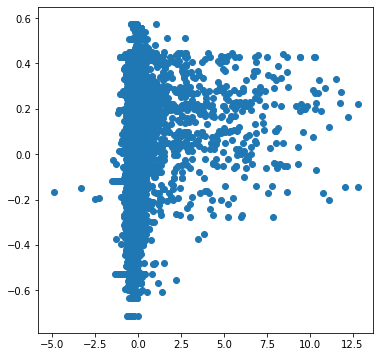

In [17]:
plt.figure(figsize=(6,6))
plt.scatter(test_y, data_pred)
plt.show()

## Site = 1(같은 위치)인 데이터로 분석

In [16]:
data_1 = full_data[full_data['Site'] == 1]
data_1

,LOT_ID 2,WF_ID,Site,X axis,Y axis,Response,Para 01,Para 02,Para 03,Para 04,...,Para 10,Para 11,Para 12,Para 13,Para 14,Para 15,Para 16,Para 17,Para 18,Para 19
4,ABCA764,3,1,-122,15,0.442652,0.310317,-0.027634,-0.042412,-0.552697,...,-0.290335,0.530953,-1.001769,-0.142651,-0.142651,0.005719,0.132751,-1.201301,0.299231,0.381044
17,ABCA764,23,1,-122,15,1.322770,0.310317,-0.027634,-0.042412,-0.552697,...,-0.290335,0.530953,-1.001769,-0.142651,-0.142651,0.005719,0.132751,-1.201301,0.299231,0.381044
30,ABCA764,13,1,-122,15,2.723520,0.310317,-0.027634,-0.042412,-0.552697,...,-0.290335,0.530953,-1.001769,-0.142651,-0.142651,0.005719,0.132751,-1.201301,0.299231,0.381044
43,ABCA096,3,1,-122,15,-0.201941,0.215681,0.000902,0.010599,-0.256710,...,-0.067345,0.872186,-1.121055,0.172382,0.172382,-0.078711,0.250128,-0.174674,0.291208,0.631104
56,ABCA096,23,1,-122,15,-0.294911,0.215681,0.000902,0.010599,-0.256710,...,-0.067345,0.872186,-1.121055,0.172382,0.172382,-0.078711,0.250128,-0.174674,0.291208,0.631104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35103,ABCA954,3,1,-122,15,1.806215,-0.894824,-0.033032,0.078063,0.755640,...,1.696383,1.365605,-0.958977,0.260424,0.260424,-0.067432,0.574334,-0.861478,-2.885386,1.480820
35116,ABCA954,13,1,-122,15,0.640989,-0.894824,-0.033032,0.078063,0.755640,...,1.696383,1.365605,-0.958977,0.260424,0.260424,-0.067432,0.574334,-0.861478,-2.885386,1.480820
35129,ABC9567,23,1,-122,15,-0.394079,0.758667,-0.044600,-0.056858,1.445626,...,-0.938270,-0.170791,0.986022,-0.266835,-0.266835,-0.053996,-0.362944,0.284324,0.328684,0.482648
35142,ABC9567,13,1,-122,15,-0.378584,0.758667,-0.044600,-0.056858,1.445626,...,-0.938270,-0.170791,0.986022,-0.266835,-0.266835,-0.053996,-0.362944,0.284324,0.328684,0.482648


In [18]:
data_1 = data_1.drop(['LOT_ID 2', 'WF_ID', 'Site', 'X axis', 'Y axis'], axis=1)
data_1

,Response,Para 01,Para 02,Para 03,Para 04,Para 05,Para 06,Para 07,Para 08,Para 09,Para 10,Para 11,Para 12,Para 13,Para 14,Para 15,Para 16,Para 17,Para 18,Para 19
4,0.442652,0.310317,-0.027634,-0.042412,-0.552697,-0.520095,0.353447,-0.511689,0.991691,-0.962300,-0.290335,0.530953,-1.001769,-0.142651,-0.142651,0.005719,0.132751,-1.201301,0.299231,0.381044
17,1.322770,0.310317,-0.027634,-0.042412,-0.552697,-0.520095,0.353447,-0.511689,0.991691,-0.962300,-0.290335,0.530953,-1.001769,-0.142651,-0.142651,0.005719,0.132751,-1.201301,0.299231,0.381044
30,2.723520,0.310317,-0.027634,-0.042412,-0.552697,-0.520095,0.353447,-0.511689,0.991691,-0.962300,-0.290335,0.530953,-1.001769,-0.142651,-0.142651,0.005719,0.132751,-1.201301,0.299231,0.381044
43,-0.201941,0.215681,0.000902,0.010599,-0.256710,-0.649771,-0.107589,-0.390153,1.151891,-0.346426,-0.067345,0.872186,-1.121055,0.172382,0.172382,-0.078711,0.250128,-0.174674,0.291208,0.631104
56,-0.294911,0.215681,0.000902,0.010599,-0.256710,-0.649771,-0.107589,-0.390153,1.151891,-0.346426,-0.067345,0.872186,-1.121055,0.172382,0.172382,-0.078711,0.250128,-0.174674,0.291208,0.631104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35103,1.806215,-0.894824,-0.033032,0.078063,0.755640,0.849456,0.110311,1.457810,0.943681,0.582912,1.696383,1.365605,-0.958977,0.260424,0.260424,-0.067432,0.574334,-0.861478,-2.885386,1.480820
35116,0.640989,-0.894824,-0.033032,0.078063,0.755640,0.849456,0.110311,1.457810,0.943681,0.582912,1.696383,1.365605,-0.958977,0.260424,0.260424,-0.067432,0.574334,-0.861478,-2.885386,1.480820
35129,-0.394079,0.758667,-0.044600,-0.056858,1.445626,-0.871165,-0.129132,0.238300,-1.117700,1.348486,-0.938270,-0.170791,0.986022,-0.266835,-0.266835,-0.053996,-0.362944,0.284324,0.328684,0.482648
35142,-0.378584,0.758667,-0.044600,-0.056858,1.445626,-0.871165,-0.129132,0.238300,-1.117700,1.348486,-0.938270,-0.170791,0.986022,-0.266835,-0.266835,-0.053996,-0.362944,0.284324,0.328684,0.482648


In [20]:
data_1_X = data_1.drop(['Response'], axis=1)
data_1_Y = data_1['Response']

## Train, Test Split

In [21]:
train_x, test_x, train_y, test_y = train_test_split(data_1_X, data_1_Y, test_size=0.3, random_state=2020)

## X 데이터 정규화

In [22]:
sc = StandardScaler()
train_x_sc = sc.fit_transform(train_x)
test_x_sc = sc.fit_transform(test_x)

In [23]:
lm = sm.OLS(train_y, train_x)

In [24]:
lm_trained = lm.fit()

In [25]:
lm_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Response   R-squared (uncentered):                   0.094
Model:                            OLS   Adj. R-squared (uncentered):              0.086
Method:                 Least Squares   F-statistic:                              10.86
Date:                Tue, 28 Jan 2020   Prob (F-statistic):                    4.56e-30
Time:                        14:44:17   Log-Likelihood:                         -4178.1
No. Observations:                1893   AIC:                                      8392.
Df Residuals:                    1875   BIC:                                      8492.
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Para 01        0.1530      0.314      0.488      0.626      -0.462       0.768
Para 02        1.8497      2.056      0.899      0.369      -2.183       5.883
Para 03        1.2051      1.671      0.721      0.471      -2.072       4.483
Para 04       -0.1432      0.158     -0.906      0.365      -0.453       0.167
Para 05       -0.0795      0.273     -0.291      0.771      -0.615       0.456
Para 06        0.1923      0.167      1.153      0.249      -0.135       0.519
Para 07        0.5861      0.557      1.053      0.293      -0.506       1.678
Para 08       -0.0011      0.351     -0.003      0.997      -0.690       0.688
Para 09       -1.5275      0.209     -7.304      0.000      -1.938      -1.117
Para 10       -0.4138      0.240     -1.726      0.085      -0.884       0.056
Para 11        0.0657      0.402      0.163      0.870      -0.723       0.855
Para 12        1.3607      0.226      6.023      0.000       0.918       1.804
Para 13       -0.4568      0.201     -2.270      0.023      -0.851      -0.062
Para 14       -0.4568      0.201     -2.270      0.023      -0.851      -0.062
Para 15        1.2628      0.751      1.682      0.093      -0.210       2.735
Para 16        0.3903      0.554      0.705      0.481      -0.696       1.477
Para 17       -0.5396      0.227     -2.375      0.018      -0.985      -0.094
Para 18       -0.8445      0.423     -1.998      0.046      -1.673      -0.016
Para 19        0.0005      0.062      0.008      0.994      -0.122       0.123
==============================================================================
Omnibus:                     1146.072   Durbin-Watson:                   1.738
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9634.146
Skew:                           2.825   Prob(JB):                         0.00
Kurtosis:                      12.498   Cond. No.                     4.49e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.1e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [26]:
y_pred_tr_lm = lm_trained.predict(train_x)
y_pred_ts_lm= lm_trained.predict(test_x)

## DecisionTree 모델 구축

In [27]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=2020)
dt_reg.fit(train_x_sc, train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=2020, splitter='best')

In [28]:
y_pred_tr_tree = dt_reg.predict(train_x_sc)
y_pred_ts_tree = dt_reg.predict(test_x_sc)

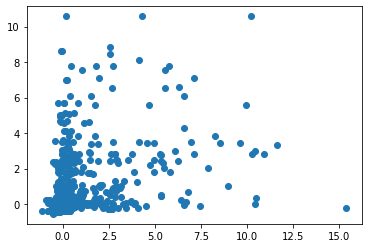

In [29]:
plt.scatter(test_y, y_pred_ts_tree)

## Linear Regression, DecisionTree 결과값 도출

### MSE 결과값

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
print('Training MSE in Linear: {:.3f}' .format(mean_squared_error(train_y, y_pred_tr_lm)))
print('Testing MSE in Linear: {:.3f}' .format(mean_squared_error(test_y, y_pred_ts_lm)))
print('Training MSE in DT: {:.3f}'.format(mean_squared_error(train_y, y_pred_tr_tree)))
print('Testing MSE in DT: {:.3f}'.format(mean_squared_error(test_y, y_pred_ts_tree)))

Training MSE in Linear: 4.837
Testing MSE in Linear: 3.760
Training MSE in DT: 1.496
Testing MSE in DT: 4.173


### R_squared 결과값

In [31]:
print('Training R2 in Linear: {:.3f}' .format(r2_score(train_y, y_pred_tr_lm)))
print('Testing R2 in Linear: {:.3f}' .format(r2_score(test_y, y_pred_ts_lm)))
print('Training R2 in DT: {:.3f}'.format(r2_score(train_y, y_pred_tr_tree)))
print('Testing R2 in DT: {:.3f}'.format(r2_score(test_y, y_pred_ts_tree)))

Training R2 in Linear: -0.047
Testing R2 in Linear: -0.057
Training R2 in DT: 0.676
Testing R2 in DT: -0.174


## RandomForest 모델 구축

In [37]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=30, n_estimators=100, random_state=2020)
rf.fit(train_x_sc, train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=2020, verbose=0, warm_start=False)

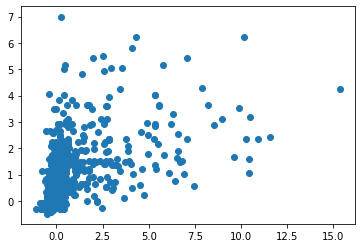

In [38]:
y_pred_tr_rf = rf.predict(train_x_sc)
y_pred_ts_rf = rf.predict(test_x_sc)
plt.scatter(test_y, y_pred_ts_rf)

### MSE 결과값

In [39]:
print('Training MSE in RandomForest: {:.3f}'.format(mean_squared_error(train_y, y_pred_tr_rf)))
print('Testing MSE in RandomForest: {:.3f}'.format(mean_squared_error(test_y, y_pred_ts_rf)))

Training MSE in RandomForest: 1.597
Testing MSE in RandomForest: 2.826


### R_squared 결과값

In [40]:
print('Training R2 in RandomForest: {:.3f}' .format(r2_score(train_y, y_pred_tr_rf)))
print('Testing R2 in RandomForest: {:.3f}' .format(r2_score(test_y, y_pred_ts_rf)))

Training R2 in RandomForest: 0.654
Testing R2 in RandomForest: 0.205
